# Regressions

## Linear regressions

__Import the Duncan/carData dataset__

In [2]:
import statsmodels.api as sm
dataset = sm.datasets.get_rdataset("Duncan", "carData")
df = dataset.data
df.head()

,type,income,education,prestige
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90


__Estimate by hand the model $\text{income} = \alpha + \beta  \times \text{education}$ . Plot.__

__Compute total, explained, unexplained variance. Compute R^2 statistics__

__Use statsmodels (formula API) to estimate $\text{income} = \alpha + \beta  \times \text{education}$. Comment regression statistics.__

In [9]:
#https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html

from statsmodels.formula import api as smf

model_1 = smf.ols("income ~ education", df)
res_1 = model_1.fit()

In [10]:
res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     47.51
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           1.84e-08
Time:                        11:29:50   Log-Likelihood:                -190.42
No. Observations:                  45   AIC:                             384.8
Df Residuals:                      43   BIC:                             388.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.6035      5.198      2.040      0.048       0.120      21.087
education      0.5949      0.086      6.893      0.000       0.421       0.769
==============================================================================
Omnibus:                        9.841   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.609
Skew:                           0.776   Prob(JB):                      0.00497
Kurtosis:                       4.802   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The estimated regresssion is `income = 10.6 + 0.59 education`. At a 5% p-value level both the intercept and the coefficient are significant.
R-squared is 0.52: the model explains half of the variance.

__Use statsmodels to estimate $\text{income} = \alpha + \beta  \times \text{prestige}$. Comment regression statistics.__

In [15]:
formula = "income ~ education"

In [16]:
df.head()

,type,income,education,prestige
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90


In [47]:
model_2 = smf.ols("income ~ prestige", df)
res_2 = model_2.fit()

In [48]:
res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     101.3
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           7.14e-13
Time:                        11:55:59   Log-Likelihood:                -179.93
No. Observations:                  45   AIC:                             363.9
Df Residuals:                      43   BIC:                             367.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.8840      3.678      2.959      0.005       3.467      18.301
prestige       0.6497      0.065     10.062      0.000       0.519       0.780
==============================================================================
Omnibus:                        8.893   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               19.848
Skew:                           0.047   Prob(JB):                     4.90e-05
Kurtosis:                       6.252   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The estimated regresssion is `income = 10.6 + 0.59 education`.
At a 0.5% p-value level both the intercept and the coefficient are significant.
R-squared is 0.70: the model predicts income better than the former one.

__Use statsmodels to estimate $\text{income} = \alpha + \beta  \times \text{education}  + \beta_2  \times \text{prestige}  + $. Comment regression statistics.__

In [49]:
model_3 = smf.ols("income ~ education + prestige", df)
res_3 = model_3.fit()

In [50]:
res_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     49.55
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           8.88e-12
Time:                        11:56:03   Log-Likelihood:                -179.90
No. Observations:                  45   AIC:                             365.8
Df Residuals:                      42   BIC:                             371.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4264      4.164      2.504      0.016       2.024      18.829
education      0.0323      0.132      0.244      0.808      -0.234       0.299
prestige       0.6237      0.125      5.003      0.000       0.372       0.875
==============================================================================
Omnibus:                        9.200   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               21.265
Skew:                           0.075   Prob(JB):                     2.41e-05
Kurtosis:                       6.364   Cond. No.                         168.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


---
The $R^2$ is only slightly higher than last model, but adjusted $R^2$ is actually lower: the model has less predictive power.

The coefficient for `education` is not significant. It should be dropped from the regresssion.

This might happen, because education and prestige are correlated. Let's check it:

In [37]:
df.corr()

,income,education,prestige
income,1.000000,0.724512,0.837801
education,0.724512,1.000000,0.851916
prestige,0.837801,0.851916,1.000000


Education and prestige are correlated at 83\%. It makes no sense keeping the two in the same regression.

__WHich model would you recommend? For which purpose?__

If the goal is to predict income, the one with prestige only, has the highest prediction power.
If we are interested in the effect of education, we keep only education.

__Plot the regression with prestige__

In [53]:
a = res_2.params.Intercept
b = res_2.params.prestige


In [54]:
x = df['prestige']

In [55]:
y = a + b*x

Text(0.5, 0, 'income')

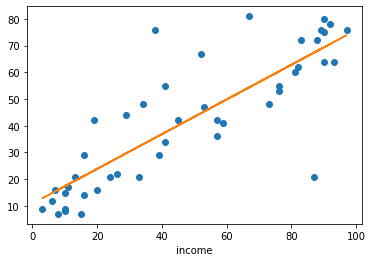

In [57]:
from matplotlib import pyplot as plt
plt.plot(x, df['income'],'o')
plt.plot(x, y)
plt.xlabel("prestige")
plt.xlabel("income")

__Check visually normality of residuals__

In [62]:
pred = a + b*x
actual = df['income']
resid = actual - pred  # same as res_2.resid

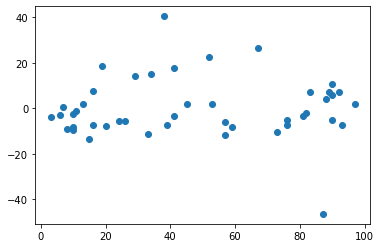

In [65]:
plt.plot(x,resid, 'o')

(array([0.00255915, 0.        , 0.        , 0.00511829, 0.0486238 ,
        0.02815062, 0.01535488, 0.01023659, 0.00255915, 0.00255915]),
 array([-46.40643935, -37.72299114, -29.03954294, -20.35609473,
        -11.67264653,  -2.98919832,   5.69424989,  14.37769809,
         23.0611463 ,  31.74459451,  40.42804271]),
 <BarContainer object of 10 artists>)

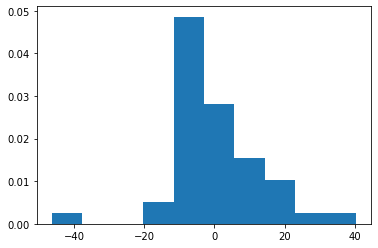

In [69]:
plt.hist(resid)

## Finding the right model

__Import dataset from `data.dta`. Explore dataset (statistics, plots)__

In [1]:
import pandas

In [4]:
df = pandas.read_stata('data.dta')
df.head()

,index,x,y,z
0,0,1.504053,0.543556,1.917895
1,1,43.619758,0.543113,4.058487
2,2,1.226398,0.736955,1.785403
3,3,89.103260,0.996219,6.321152
4,4,32.117073,0.140142,3.445228


__Our goal is to explain `z` by `x` and `y`. Run a regression.__

In [5]:
from statsmodels.formula import api as smf

In [37]:
model = smf.ols('z ~ x + y', data=df)
res = model.fit()

In [38]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      z   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     93.90
Date:                Tue, 23 Feb 2021   Prob (F-statistic):           3.82e-17
Time:                        10:41:10   Log-Likelihood:                -57.244
No. Observations:                  50   AIC:                             120.5
Df Residuals:                      47   BIC:                             126.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2177      0.243      5.019      0.000       0.730       1.706
x              0.0356      0.003     12.235      0.000       0.030       0.041
y              1.9128      0.369      5.177      0.000       1.169       2.656
==============================================================================
Omnibus:                        3.205   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.201   Jarque-Bera (JB):                2.349
Skew:                           0.277   Prob(JB):                        0.309
Kurtosis:                       3.906   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Comments__: regression looks significant. $R^2$ looks good.
Fisher statistics, is conclusive (the hypothesis H0 that all coefficients are zero is rejected at a  `3.82e-17` confidence level..
The student statistics are also quite high. For each coefficient, the hypothesis H0 that coefficient is zero is rejected at a 0.001 confidence level.

__Examine the residuals of the regression. What's wrong? Remedy?__

In [39]:
from matplotlib import pyplot as plt

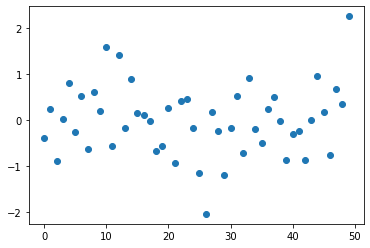

In [41]:
plt.plot(res.resid, 'o')

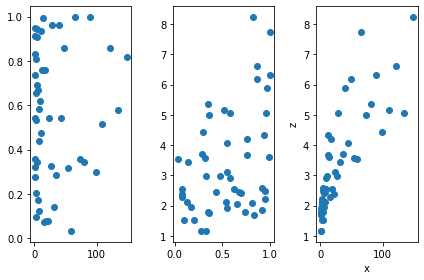

In [25]:
plt.subplot(131)
plt.plot(df['x'], df['y'],'o')
plt.subplot(132)
plt.plot(df['y'], df['z'],'o')
plt.subplot(133)
plt.plot(df['x'], df['z'],'o')
plt.xlabel("x")
plt.ylabel("z")

plt.tight_layout()

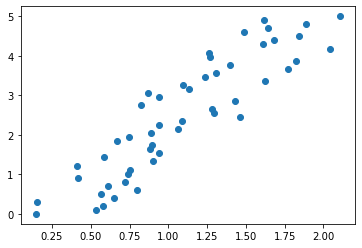

In [30]:
import numpy as np
plt.plot( np.log(df['z']), np.log(df['x']), 'o' )

Apparently, there is a linear relationship between 'log(x)' and `log(y)`

In [32]:
from numpy import log

In [44]:
model = smf.ols('log(z) ~ log(x) + y', data=df)
res = model.fit()

In [45]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log(z)   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     525.6
Date:                Tue, 23 Feb 2021   Prob (F-statistic):           6.89e-33
Time:                        10:41:56   Log-Likelihood:                 44.223
No. Observations:                  50   AIC:                            -82.45
Df Residuals:                      47   BIC:                            -76.71
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0128      0.039      0.326      0.746      -0.066       0.092
log(x)         0.2957      0.010     29.878      0.000       0.276       0.316
y              0.6164      0.048     12.735      0.000       0.519       0.714
==============================================================================
Omnibus:                        4.351   Durbin-Watson:                   2.490
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                1.936
Skew:                           0.089   Prob(JB):                        0.380
Kurtosis:                       2.052   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

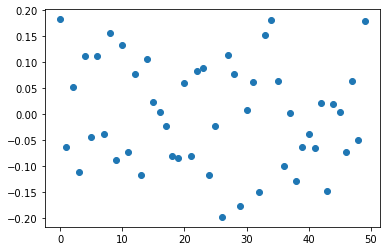

In [36]:
plt.plot(res.resid, 'o')

## Taylor Rule

In 1993, John taylor, estimated, using US data the regression: $i_t = i^{\star} + \alpha_{\pi} \pi_t + \alpha_{\pi} y_t$ where $\pi_t$ is inflation and $y_t$ the output gap (let's say deviation from real gdp from the trend).
He found that both coefficients were not significantly different from $0.5$.
Our goal, is to replicate the same analysis.

__Import macro data from statsmodels (https://www.statsmodels.org/devel/datasets/generated/macrodata.html)__

In [18]:
import statsmodels

## google: stats models macrodata
## google: statsmodels datasets  -> example in the tutorial

# https://www.statsmodels.org/0.6.1/datasets/index.html
# example about how to use lengley database

In [4]:
import statsmodels.api as sm

In [19]:
sm.datasets.macrodata

<module 'statsmodels.datasets.macrodata' from '/home/pablo/.local/opt/miniconda3/lib/python3.8/site-packages/statsmodels/datasets/macrodata/__init__.py'>

In [24]:
ds = sm.datasets.macrodata.load_pandas()

In [71]:
df = ds.raw_data
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


__Create a database with all variables of interest including detrended gdp__

In [72]:
gdp = df['realgdp']
inflation = df['infl']
realint = df['realint']

In [73]:
ddf = df # 

In [74]:
ddf.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


We use the fisher relation: $r_t = i_t - \pi_t$

In [75]:
ddf['ir'] = ddf['realint'] + ddf['infl']

to detrend the gdp, we use hp-filter function from scipy
google: hpfilter scipy

In [76]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [77]:
cycle, trend = hpfilter(ddf['realgdp'])

In [78]:
ddf['gdp'] = cycle/trend*100 # nominal interest rate and inflation are in percent

In [79]:
ddf.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,ir,gdp
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,0.00,1.479383
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,3.08,2.967657
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,3.83,1.792534
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,4.33,1.110571
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,3.50,2.331547


__Run the basic regression__

In [80]:
from statsmodels.formula import api as sm

In [84]:
model = sm.ols("ir ~ infl + gdp", data=ddf) # no intercept
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ir   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     63.65
Date:                Tue, 02 Mar 2021   Prob (F-statistic):           4.06e-22
Time:                        11:54:15   Log-Likelihood:                -448.17
No. Observations:                 203   AIC:                             902.3
Df Residuals:                     200   BIC:                             912.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2035      0.252     12.696      0.000       2.706       3.701
infl           0.5288      0.050     10.557      0.000       0.430       0.628
gdp            0.0795      0.105      0.759      0.449      -0.127       0.286
==============================================================================
Omnibus:                       30.222   Durbin-Watson:                   0.417
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.662
Skew:                           0.796   Prob(JB):                     9.98e-12
Kurtosis:                       4.858   Cond. No.                         8.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Which control variables would you propose to add? Does it increase prediction power? How do you interpret that?__

In [85]:
ddf.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,ir,gdp
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,0.00,1.479383
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,3.08,2.967657
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,3.83,1.792534
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,4.33,1.110571
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,3.50,2.331547


In [88]:
model = sm.ols("ir ~ infl + gdp + pop + unemp -1", data=ddf) # no intercept
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     ir   R-squared (uncentered):                   0.884
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              380.2
Date:                Tue, 02 Mar 2021   Prob (F-statistic):                    5.64e-92
Time:                        11:58:05   Log-Likelihood:                         -432.84
No. Observations:                 203   AIC:                                      873.7
Df Residuals:                     199   BIC:                                      886.9
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
infl           0.4380      0.049      8.895      0.000       0.341       0.535
gdp            0.5710      0.120      4.739      0.000       0.333       0.809
pop           -0.0050      0.002     -2.068      0.040      -0.010      -0.000
unemp          0.8064      0.108      7.458      0.000       0.593       1.020
==============================================================================
Omnibus:                        5.307   Durbin-Watson:                   0.391
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                7.501
Skew:                           0.070   Prob(JB):                       0.0235
Kurtosis:                       3.931   Cond. No.                         247.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

At confidence level 2.5% gdp is between 0.333 and 0.809.

At confidence level 2.5% infl is between 0.341 and 0.535.

The coefficients would be significantly different from 0.5 if 0.5 was not in the condifence interval.